In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from summa.summarizer import summarize as summa_summarize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\liron firuz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\liron
[nltk_data]     firuz\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\liron
[nltk_data]     firuz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
data=pd.read_csv('Data_after_preprocessing.csv')
data

,headline,abstract,lead paragraph,first keyword,keywords,type of material
0,1919: The Year of the Crack-Up,"From the Treaty of Versailles to Prohibition, ...","Throughout 2019, The New York Times Opinion se...",United States Politics and Government,"['United States Politics and Government', 'New...",Op-Ed
1,In Search of Lost Screen Time,"Imagine what we could do with our money, and h...",More than three-quarters of all Americans own ...,Smartphones,"['Smartphones', 'Social Media']",Op-Ed
2,"Warren Wells, Star Receiver With a Derailed Ca...",Wells was a deep threat for the vaunted Oaklan...,"Warren Wells, a former wide receiver who becam...","Wells, Warren (1942-2018)","['Wells, Warren (1942-2018)', 'Football', 'Dea...",Obituary (Obit)
3,2019: The Year of the Wolves,Can the Constitution withstand the partisans?,"In Willa Cather’s novel “My Antonia,” there ar...","Trump, Donald J","['Trump, Donald J', 'United States Politics an...",Op-Ed
4,Why Trump Reigns as King Cyrus,The Christian right doesn’t like the president...,"The month before the 2018 midterms, a thousand...",United States Politics and Government,"['United States Politics and Government', 'Bib...",Op-Ed
...,...,...,...,...,...,...
3916,"As Trump Demands His Wall, Lawmakers Plead for...",Lawmakers reacted with concern and bewildermen...,WASHINGTON — President Trump proclaimed on Thu...,Border Barriers,"['Border Barriers', 'Trump, Donald J', 'United...",News
3917,U.S. Appears to Soften Timing for List of Nort...,A top diplomat said the Trump administration m...,WASHINGTON — A top American diplomat signaled ...,United States International Relations,"['United States International Relations', 'ARM...",News
3918,"Dusan Makavejev, 86. Eyebrow-Raising Serbian D...","His films, among them “WR: Mysteries of the Or...","Dusan Makavejev, a Serbian director whose movi...","Makavejev, Dusan","['Makavejev, Dusan', 'Deaths (Obituaries)', 'M...",Obituary (Obit)
3919,"A Year Into the Overlooked Project, Widening t...","In the past year, The Times published obituari...",Times Insider explains who we are and what we ...,Women and Girls,"['Women and Girls', 'Race and Ethnicity', 'Gor...",News


#### KNOWN Y COLUMN

In [3]:
#We are checking whether it is possible to create a text classification model for the Y column using the NLTK method when Y is known(type of matrial)

In [4]:
def preprocess_text(text):
    if isinstance(text, str):
        stemmer = PorterStemmer()
        lemmatizer = WordNetLemmatizer()
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)
        ner_tags = ne_chunk(pos_tags)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word, pos in pos_tags if word not in stop_words and (pos.startswith('NN') or pos.startswith('NNP'))]
        stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
        return lemmatized_tokens
    else:
        return ''

data['Text'] = data['headline'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['type of material'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy1 = accuracy_score(y_test, y_pred)

In [5]:
data['Text'] = data['abstract'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['type of material'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy2 = accuracy_score(y_test, y_pred)

In [6]:
data['Text'] = data['lead paragraph'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['type of material'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy3 = accuracy_score(y_test, y_pred)

In [7]:
data['Text'] = data['first keyword'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['type of material'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy4 = accuracy_score(y_test, y_pred)

In [8]:
data['Text'] = data['keywords'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['type of material'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy5 = accuracy_score(y_test, y_pred)

In [9]:
accuracy_table = pd.DataFrame({
    'headline': [accuracy1],
    'abstract': [accuracy2],
    'lead paragraph': [accuracy3],
    'first keyword': [accuracy4],
    'keywords': [accuracy5],
})
accuracy_table

,headline,abstract,lead paragraph,first keyword,keywords
0,0.773248,0.765605,0.789809,0.765605,0.765605


In [10]:
# It can be seen that most of the models have a close level of accuracy when lead paragraph has a better result in prediction. 
#In most cases the large category "news" is the one that has prediction errors that affect the accuracy.

#### WITHOUT Y COULMN

In [11]:
#We will try to examine whether it is possible to create a text classification model according to NLTK without the Y column

In [12]:
data['Text'] = data['headline'].apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 20
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

headline_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in headline_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda1 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')


In [13]:
data['Text'] = data['abstract'].apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 20
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

abstract_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in abstract_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda2 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')


In [14]:
data['Text'] = data['lead paragraph'].apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 20
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

lead_paragraph_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in lead_paragraph_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda3 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')

In [15]:
data['Text'] = data['first keyword'].astype(str).apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 20
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

first_keyword_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in first_keyword_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda4 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')

In [16]:
data['Text'] = data['keywords'].astype(str).apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 20
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

keywords_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in keywords_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda5 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')

In [17]:
Coherence_Score_table = pd.DataFrame({
    'headline': [coherence_lda1],
    'abstract': [coherence_lda2],
    'lead paragraph': [coherence_lda3],
    'first keyword': [coherence_lda4],
    'keywords': [coherence_lda5],
})


In [18]:
Coherence_Score_table

,headline,abstract,lead paragraph,first keyword,keywords
0,0.597735,0.397368,0.292473,0.739489,0.420529


In [19]:
#It seems that the results of headline and first keyword are the highest.
#According to this approach classification by the first keyword is the model with the highest level of Coherence.

In [20]:
#important note -We tested several subject sizes up to a size of 80 subjects. There is no substantial change in the coherence score. 
#We chose to go for 20 topics - close to the column type of material.

In [21]:
#to get a better understanding about the topics that was made, let do word cloud to first keyword and headline

Words extracted for Category 0: ['york', 'citi', 'j', 'trump', 'donald', 'book', 'literatur', 'time', 'inc', 'art', 'elect', 'rock', 'tie', 'pop', 'interfer', 'associ', 'music', 'crossword', 'govern', 'puzzl', 'polit', 'nan', 'movi', 'televis', 'state', 'shutdown', 'footbal', 'basketbal', 'theater', 'immigr']


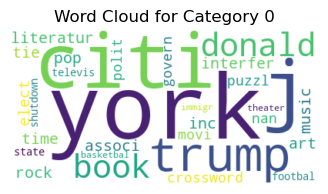

Words extracted for Category 1: ['time', 'york', 'estat', 'residenti', 'hous', 'shutdown', 'trump', 'donald', 'j', 'literatur', 'book', 'state', 'theater', 'music', 'pop', 'rock', 'forc', 'defens', 'basketbal', 'nan', 'movi', 'televis', 'footbal', 'elect', 'immigr', 'govern', 'polit', 'art', 'britain', 'china']


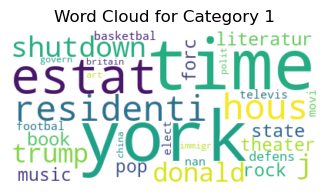

Words extracted for Category 2: ['elect', 'inc', 'movi', 'crossword', 'puzzl', 'york', 'citi', 'china', 'literatur', 'govern', 'book', 'nan', 'associ', 'polit', 'interfer', 'tie', 'state', 'tenni', 'music', 'theater', 'televis', 'footbal', 'shutdown', 'immigr', 'basketbal', 'britain', 'trump', 'j', 'art', 'restaur']


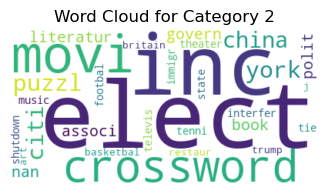

Words extracted for Category 3: ['state', 'basebal', 'economi', 'relat', 'polit', 'govern', 'movi', 'basketbal', 'j', 'donald', 'forc', 'defens', 'trump', 'york', 'woman', 'girl', 'hous', 'book', 'tenni', 'art', 'nan', 'shutdown', 'televis', 'footbal', 'theater', 'immigr', 'music', 'china', 'literatur', 'elect']


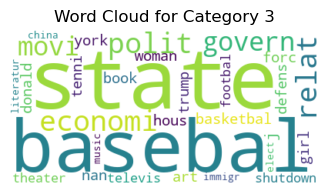

Words extracted for Category 4: ['theater', 'elect', 'interfer', 'tie', 'associ', 'immigr', 'shutdown', 'withdraw', 'brexit', 'britain', 'art', 'residenti', 'cook', 'estat', 'hous', 'govern', 'cookbook', 'polit', 'defens', 'basketbal', 'movi', 'nan', 'televis', 'state', 'footbal', 'music', 'book', 'tenni', 'china', 'literatur']


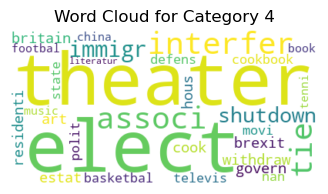

Words extracted for Category 5: ['govern', 'polit', 'state', 'defens', 'forc', 'relat', 'footbal', 'music', 'travel', 'book', 'vacat', 'literatur', 'elect', 'associ', 'tie', 'interfer', 'york', 'restaur', 'shutdown', 'time', 'nan', 'movi', 'televis', 'theater', 'basketbal', 'immigr', 'art', 'trump', 'j', 'china']


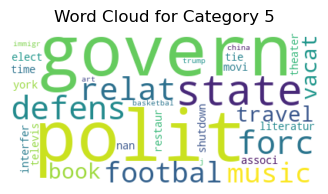

Words extracted for Category 6: ['art', 'music', 'rock', 'pop', 'hous', 'estat', 'residenti', 'movi', 'york', 'citi', 'time', 'theater', 'nan', 'basebal', 'televis', 'footbal', 'state', 'shutdown', 'govern', 'book', 'immigr', 'polit', 'basketbal', 'china', 'literatur', 'trump', 'elect', 'tenni', 'j', 'restaur']


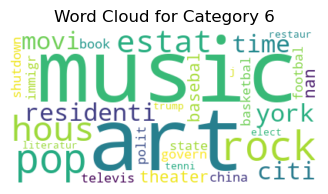

Words extracted for Category 7: ['china', 'book', 'literatur', 'cook', 'cookbook', 'music', 'donald', 'trump', 'estat', 'hous', 'girl', 'residenti', 'woman', 'j', 'restaur', 'govern', 'state', 'vacat', 'polit', 'travel', 'televis', 'nan', 'movi', 'footbal', 'shutdown', 'art', 'immigr', 'theater', 'elect', 'basketbal']


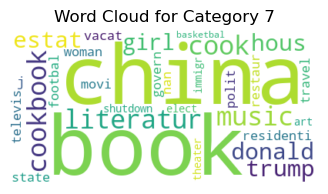

Words extracted for Category 8: ['movi', 'j', 'trump', 'donald', 'footbal', 'travel', 'vacat', 'state', 'economi', 'relat', 'york', 'time', 'hous', 'music', 'nan', 'televis', 'theater', 'literatur', 'shutdown', 'immigr', 'elect', 'polit', 'govern', 'china', 'art', 'basketbal', 'britain', 'book', 'estat', 'tenni']


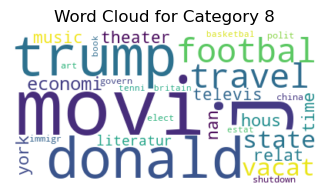

Words extracted for Category 9: ['tenni', 'restaur', 'inc', 'immigr', 'basketbal', 'vacat', 'travel', 'j', 'time', 'tie', 'interfer', 'hous', 'associ', 'donald', 'polit', 'state', 'trump', 'residenti', 'elect', 'girl', 'book', 'govern', 'cookbook', 'estat', 'woman', 'cook', 'literatur', 'music', 'footbal', 'britain']


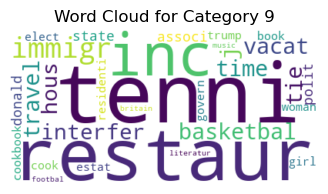

Words extracted for Category 10: ['hous', 'estat', 'residenti', 'literatur', 'book', 'immigr', 'nan', 'woman', 'movi', 'relat', 'girl', 'state', 'china', 'crossword', 'citi', 'york', 'inc', 'puzzl', 'basketbal', 'theater', 'televis', 'footbal', 'shutdown', 'music', 'govern', 'elect', 'polit', 'art', 'j', 'britain']


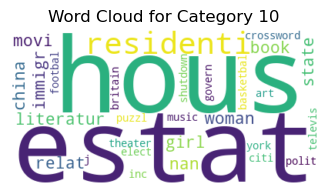

Words extracted for Category 11: ['televis', 'cook', 'cookbook', 'j', 'donald', 'trump', 'footbal', 'britain', 'restaur', 'withdraw', 'hous', 'residenti', 'brexit', 'estat', 'basebal', 'nan', 'movi', 'shutdown', 'theater', 'state', 'book', 'basketbal', 'art', 'govern', 'polit', 'immigr', 'music', 'elect', 'york', 'literatur']


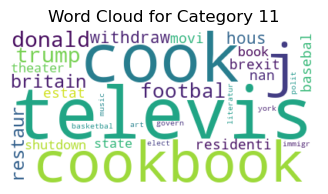

Words extracted for Category 12: ['shutdown', 'footbal', 'brexit', 'withdraw', 'britain', 'donald', 'trump', 'j', 'travel', 'vacat', 'book', 'televis', 'interfer', 'associ', 'tie', 'elect', 'time', 'literatur', 'york', 'polit', 'nan', 'movi', 'state', 'theater', 'govern', 'art', 'music', 'basketbal', 'immigr', 'china']


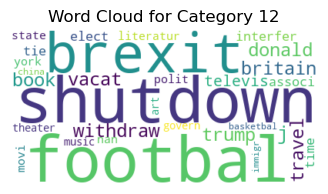

Words extracted for Category 13: ['nan', 'polit', 'govern', 'state', 'footbal', 'movi', 'televis', 'hous', 'residenti', 'estat', 'economi', 'puzzl', 'crossword', 'literatur', 'book', 'music', 'basketbal', 'rock', 'pop', 'defens', 'cook', 'elect', 'forc', 'cookbook', 'basebal', 'shutdown', 'theater', 'art', 'immigr', 'york']


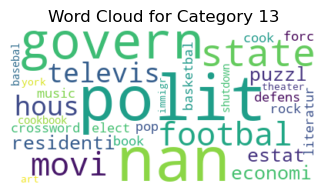

Words extracted for Category 14: ['woman', 'girl', 'televis', 'polit', 'state', 'govern', 'rock', 'music', 'pop', 'immigr', 'nan', 'citi', 'york', 'defens', 'donald', 'forc', 'j', 'trump', 'cook', 'cookbook', 'art', 'theater', 'movi', 'shutdown', 'footbal', 'basketbal', 'book', 'basebal', 'restaur', 'britain']


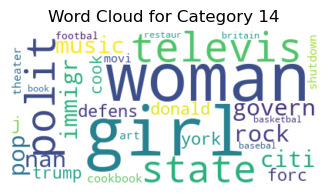

Words extracted for Category 15: ['book', 'literatur', 'music', 'state', 'nan', 'polit', 'economi', 'pop', 'govern', 'rock', 'restaur', 'tenni', 'cook', 'cookbook', 'televis', 'shutdown', 'movi', 'footbal', 'theater', 'art', 'elect', 'basketbal', 'britain', 'hous', 'estat', 'china', 'immigr', 'trump', 'york', 'j']


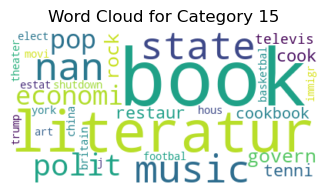

Words extracted for Category 16: ['nan', 'televis', 'art', 'j', 'trump', 'donald', 'movi', 'theater', 'basebal', 'restaur', 'footbal', 'cook', 'literatur', 'cookbook', 'york', 'book', 'state', 'china', 'shutdown', 'basketbal', 'immigr', 'polit', 'govern', 'tenni', 'music', 'britain', 'elect', 'estat', 'hous', 'travel']


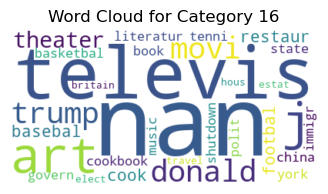

Words extracted for Category 17: ['crossword', 'puzzl', 'tenni', 'nan', 'girl', 'woman', 'britain', 'govern', 'brexit', 'york', 'withdraw', 'citi', 'polit', 'basebal', 'cookbook', 'cook', 'state', 'movi', 'televis', 'shutdown', 'theater', 'footbal', 'art', 'music', 'basketbal', 'literatur', 'book', 'china', 'elect', 'estat']


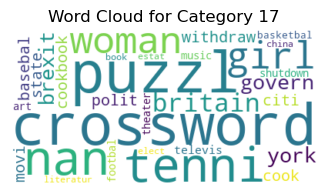

Words extracted for Category 18: ['travel', 'vacat', 'brexit', 'withdraw', 'britain', 'citi', 'estat', 'nan', 'york', 'literatur', 'book', 'movi', 'hous', 'residenti', 'basketbal', 'forc', 'defens', 'restaur', 'shutdown', 'state', 'art', 'govern', 'theater', 'footbal', 'televis', 'music', 'china', 'polit', 'immigr', 'tenni']


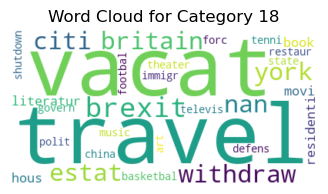

Words extracted for Category 19: ['basketbal', 'britain', 'state', 'govern', 'polit', 'movi', 'tenni', 'york', 'j', 'trump', 'girl', 'time', 'withdraw', 'donald', 'brexit', 'woman', 'nan', 'literatur', 'citi', 'relat', 'book', 'art', 'theater', 'televis', 'shutdown', 'footbal', 'music', 'immigr', 'elect', 'china']


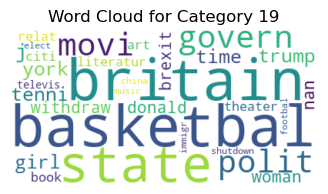

In [22]:
for category, keyword_string in first_keyword_topics:
    words = []

    matches = re.findall(r'"\w+"', keyword_string)
    for match in matches:
        word = match.strip('"')
        words.append(word)

    text = ' '.join(words)

    if words:
        print(f"Words extracted for Category {category}: {words}")
        
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
        plt.figure(figsize=(4, 2))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Category {category}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No words extracted for Category {category}.")


Words extracted for Category 0: ['trump', 'wall', 'immigr', 'job', 'border', 'student', 'death', 'histori', 'life', 'hous', 'china', 'brief', 'right', 'year', 'worker', 'crisi', 'today', 'week', 'tv', 'brexit', 'review', 'oscar', 'case', 'stori', 'charg', 'john', 'polic', 'man']


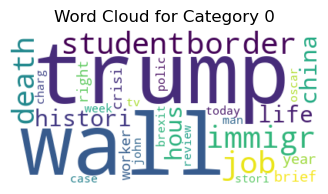

Words extracted for Category 1: ['weekend', 'plan', 'nyc', 'brief', 'quiz', 'thing', 'word', 'even', 'brexit', 'oscar', 'report', 'trump', 'music', 'film', 'deal', 'health', 'war', 'protest', 'home', 'presid', 'peopl', 'place', 'border', 'famili', 'die', 'time', 'attack', 'art']


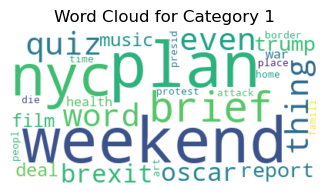

Words extracted for Category 2: ['leader', 'life', 'music', 'art', 'offici', 'oscar', 'child', 'trump', 'stori', 'brexit', 'govern', 'news', 'wall', 'tv', 'worker', 'report', 'show', 'star', 'nyc', 'citi', 'crisi', 'deal', 'offic', 'weekend', 'hous', 'way', 'time', 'job', 'school']


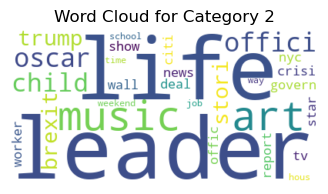

Words extracted for Category 3: ['venezuela', 'china', 'way', 'govern', 'crisi', 'john', 'trump', 'charg', 'power', 'bill', 'world', 'state', 'hous', 'brief', 'music', 'weekend', 'time', 'shutdown', 'attack', 'review', 'teacher', 'news', 'leader', 'health', 'home', 'worker', 'globe', 'nyc']


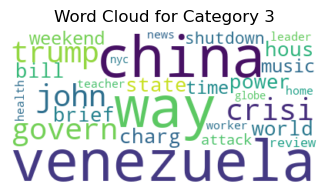

Words extracted for Category 4: ['woman', 'york', 'news', 'hous', 'quiz', 'die', 'week', 'crisi', 'histori', 'word', 'place', 'season', 'time', 'weekend', 'border', 'child', 'music', 'russia', 'job', 'immigr', 'wall', 'year', 'thing', 'state', 'case', 'trump', 'nyc', 'govern']


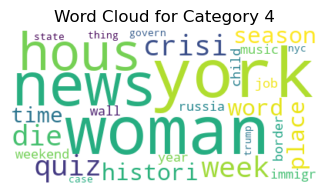

Words extracted for Category 5: ['shutdown', 'govern', 'polic', 'war', 'right', 'worker', 'health', 'offic', 'student', 'man', 'quiz', 'oscar', 'day', 'news', 'peopl', 'teacher', 'histori', 'world', 'immigr', 'trump', 'russia', 'globe', 'leader', 'place', 'woman', 'die', 'brief', 'york']


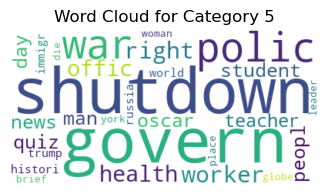

Words extracted for Category 6: ['die', 'year', 'bill', 'season', 'histori', 'famili', 'john', 'citi', 'star', 'book', 'news', 'york', 'brief', 'democrat', 'hous', 'week', 'film', 'even', 'polic', 'deal', 'tv', 'state', 'school', 'job', 'war', 'court', 'presid', 'plan']


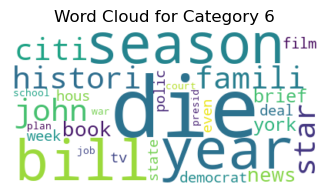

Words extracted for Category 7: ['democrat', 'world', 'protest', 'trump', 'home', 'leader', 'war', 'trade', 'woman', 'offici', 'york', 'book', 'john', 'teacher', 'time', 'plan', 'crisi', 'hous', 'govern', 'market', 'quiz', 'power', 'school', 'word', 'health', 'work', 'season', 'charg']


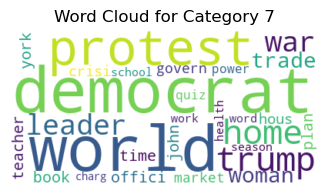

Words extracted for Category 8: ['review', 'citi', 'york', 'star', 'famili', 'world', 'home', 'word', 'attack', 'death', 'shutdown', 'place', 'man', 'woman', 'russia', 'winter', 'hous', 'die', 'trump', 'quiz', 'case', 'day', 'democrat', 'teacher', 'border', 'time', 'brief', 'court']


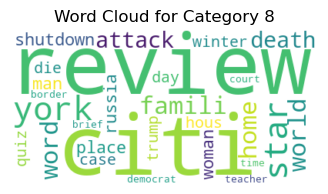

Words extracted for Category 9: ['state', 'show', 'place', 'report', 'nyc', 'weekend', 'tv', 'review', 'power', 'protest', 'war', 'wall', 'word', 'time', 'woman', 'york', 'day', 'work', 'film', 'health', 'art', 'way', 'court', 'polic', 'offic', 'case', 'quiz', 'teacher']


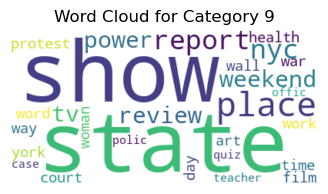

Words extracted for Category 10: ['court', 'student', 'deal', 'school', 'border', 'wall', 'season', 'teacher', 'war', 'worker', 'trump', 'life', 'syria', 'globe', 'presid', 'review', 'year', 'film', 'report', 'russia', 'right', 'winter', 'man', 'govern', 'brief', 'state', 'brexit', 'polic']


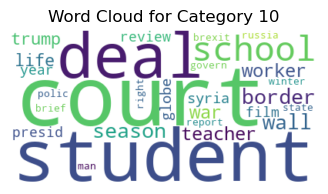

Words extracted for Category 11: ['trump', 'shutdown', 'presid', 'china', 'art', 'brief', 'trade', 'week', 'way', 'bill', 'right', 'hous', 'govern', 'deal', 'weekend', 'peopl', 'show', 'globe', 'york', 'border', 'brexit', 'woman', 'citi', 'crisi', 'talk', 'life', 'death', 'man']


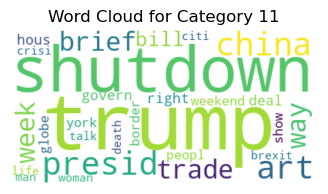

Words extracted for Category 12: ['trump', 'brexit', 'market', 'border', 'hous', 'child', 'way', 'wall', 'state', 'govern', 'famili', 'peopl', 'presid', 'deal', 'shutdown', 'school', 'globe', 'charg', 'book', 'man', 'democrat', 'review', 'music', 'student', 'news', 'offici', 'star', 'woman']


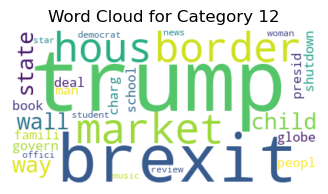

Words extracted for Category 13: ['case', 'winter', 'power', 'work', 'govern', 'globe', 'court', 'thing', 'state', 'woman', 'year', 'home', 'even', 'polic', 'brief', 'day', 'tv', 'citi', 'talk', 'shutdown', 'york', 'week', 'way', 'man', 'art', 'john', 'leader', 'trump']


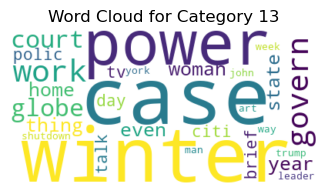

Words extracted for Category 14: ['presid', 'death', 'home', 'stori', 'trump', 'star', 'tv', 'year', 'book', 'work', 'war', 'protest', 'polic', 'time', 'famili', 'worker', 'world', 'health', 'die', 'state', 'man', 'show', 'attack', 'hous', 'nyc', 'weekend', 'shutdown', 'woman']


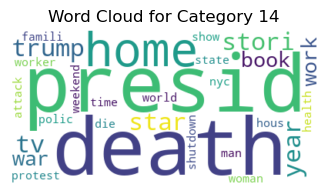

Words extracted for Category 15: ['brief', 'home', 'offic', 'peopl', 'trump', 'film', 'russia', 'teacher', 'woman', 'china', 'deal', 'brexit', 'word', 'leader', 'show', 'wall', 'democrat', 'winter', 'john', 'polic', 'quiz', 'govern', 'season', 'case', 'death', 'stori', 'charg', 'globe']


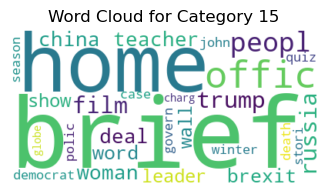

Words extracted for Category 16: ['book', 'tv', 'today', 'market', 'year', 'week', 'russia', 'trump', 'wall', 'presid', 'talk', 'border', 'offic', 'winter', 'hous', 'review', 'famili', 'art', 'health', 'woman', 'govern', 'polic', 'york', 'shutdown', 'globe', 'stori', 'report', 'democrat']


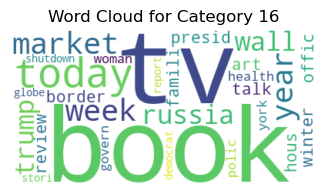

Words extracted for Category 17: ['talk', 'week', 'news', 'child', 'peopl', 'trump', 'stori', 'day', 'work', 'health', 'today', 'power', 'trade', 'shutdown', 'job', 'home', 'world', 'offic', 'polic', 'war', 'life', 'woman', 'brief', 'leader', 'state', 'john', 'globe', 'review']


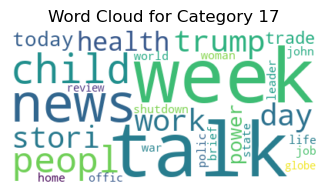

Words extracted for Category 18: ['syria', 'charg', 'year', 'trump', 'life', 'review', 'job', 'deal', 'work', 'wall', 'shutdown', 'tv', 'court', 'film', 'die', 'govern', 'border', 'way', 'china', 'today', 'democrat', 'polic', 'school', 'offic', 'case', 'world', 'hous', 'peopl']


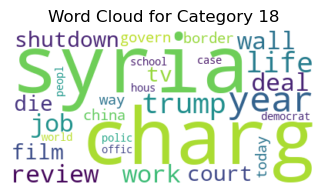

Words extracted for Category 19: ['time', 'day', 'attack', 'man', 'week', 'die', 'famili', 'weekend', 'music', 'life', 'state', 'worker', 'york', 'place', 'year', 'citi', 'wall', 'john', 'russia', 'border', 'hous', 'charg', 'market', 'world', 'democrat', 'trump', 'woman', 'globe']


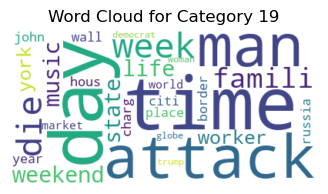

In [23]:
for category, keyword_string in headline_topics:
    words = []

    matches = re.findall(r'"\w+"', keyword_string)
    for match in matches:
        word = match.strip('"')
        words.append(word)

    text = ' '.join(words)

    if words:
        print(f"Words extracted for Category {category}: {words}")
        
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
        plt.figure(figsize=(4, 2)) 
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Category {category}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No words extracted for Category {category}.")


#### Preparing the data for use in Claster models

In [24]:
#First of all we will insert columns tf- idf

In [25]:
data['Main Keywords lead paragraph (tf- idf)'] = data['lead paragraph'].apply(preprocess_text)
data['Main Keywords abstract (tf- idf)'] = data['abstract'].apply(preprocess_text)
data['Main Keywords headline (tf- idf)'] = data['headline'].apply(preprocess_text)

In [26]:
#We would also like to check both the common keywords and whether it is possible to summarize a paragraph/extract the main idea from a paragraph

In [27]:
lemmatizer = WordNetLemmatizer()

def extracting_frequent_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    word_freq = Counter(lemmatized_words)
    frequent_words = word_freq.most_common(3)
    frequent = ', '.join([word[0] for word in frequent_words])
    return frequent 


data['abstract keywords'] = data['abstract'].apply(extracting_frequent_text)
data['lead paragraph keywords'] = data['lead paragraph'].apply(extracting_frequent_text)
data['headline keywords'] = data['headline'].apply(extracting_frequent_text)

In [28]:
def summarize_paragraph(paragraph):
    summary = summa_summarize(paragraph)
    return summary

def summarize_paragraph1(paragraph):
    # Adjust the 'ratio' parameter to control the length of the summary (default: 0.2)
    # Adjust the 'split' parameter to control how sentences are split (default: True)
    summary = summa_summarize(paragraph, ratio=0.5, split=True)
    return summary

data['lead paragraph sum'] = data['lead paragraph'].apply(summarize_paragraph1)

In [29]:
data

,headline,abstract,lead paragraph,first keyword,keywords,type of material,Text,Main Keywords lead paragraph (tf- idf),Main Keywords abstract (tf- idf),Main Keywords headline (tf- idf),abstract keywords,lead paragraph keywords,headline keywords,lead paragraph sum
0,1919: The Year of the Crack-Up,"From the Treaty of Versailles to Prohibition, ...","Throughout 2019, The New York Times Opinion se...",United States Politics and Government,"['United States Politics and Government', 'New...",Op-Ed,"[state, polit, govern, year, leagu, nation, eu...","[york, time, opinion, section, seri, essay, wa...","[treati, versail, event, year, america, world,...","[year, crackup]","treaty, versailles, prohibition","throughout, 2019, new","1919, year, crack",[]
1,In Search of Lost Screen Time,"Imagine what we could do with our money, and h...",More than three-quarters of all Americans own ...,Smartphones,"['Smartphones', 'Social Media']",Op-Ed,"[smartphon, medium]","[threequart, american, smartphon, american, ho...","[money, hour, phone, year]","[search, screen, time]","imagine, could, money","american, smartphone, 1","search, lost, screen","[In 2018 those 253 million Americans spent $1,..."
2,"Warren Wells, Star Receiver With a Derailed Ca...",Wells was a deep threat for the vaunted Oaklan...,"Warren Wells, a former wide receiver who becam...","Wells, Warren (1942-2018)","['Wells, Warren (1942-2018)', 'Football', 'Dea...",Obituary (Obit),"[well, footbal, death, obituari, raider, footb...","[warren, receiv, threat, oakland, raider, 1960...","[well, threat, oakland, offens, 1960, day, pri...","[warren, star, receiv, career, die]","well, deep, threat","warren, well, former","warren, well, star",[]
3,2019: The Year of the Wolves,Can the Constitution withstand the partisans?,"In Willa Cather’s novel “My Antonia,” there ar...","Trump, Donald J","['Trump, Donald J', 'United States Politics an...",Op-Ed,"[trump, donald, j, state, polit, govern, const...","[willa, cather, ’, novel, “, antonia, ”, kind,...","[constitut, partisan]","[year, wolv]","constitution, withstand, partisan","pavel, willa, cather","2019, year, wolf","[In Willa Cather’s novel “My Antonia,” there a..."
4,Why Trump Reigns as King Cyrus,The Christian right doesn’t like the president...,"The month before the 2018 midterms, a thousand...",United States Politics and Government,"['United States Politics and Government', 'Bib...",Op-Ed,"[state, polit, govern, movement, liberti, univ...","[month, midterm, thousand, theater, trump, pro...","[right, ’, presid, judg, style]","[trump, reign, king, cyru]","like, christian, right","trump, month, 2018","trump, reign, king",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,"As Trump Demands His Wall, Lawmakers Plead for...",Lawmakers reacted with concern and bewildermen...,WASHINGTON — President Trump proclaimed on Thu...,Border Barriers,"['Border Barriers', 'Trump, Donald J', 'United...",News,"[border, barrier, j, state, polit, govern, shu...","[washington, —, presid, trump, thursday, fund,...","[lawmak, concern, bewilder, presid, trump, bor...","[trump, lawmak, space]","border, lawmaker, reacted","border, lawmaker, would","trump, demand, wall",[]
3917,U.S. Appears to Soften Timing for List of Nort...,A top diplomat said the Trump administration m...,WASHINGTON — A top American diplomat signaled ...,United States International Relations,"['United States International Relations', 'ARM...",News,"[state, relat, arm, control, limit, weapon, st...","[washington, diplomat, thursday, state, turn, ...","[diplomat, trump, administr, inventori, asset,...","[list, ’, asset]","top, diplomat, said","washington, top, american","u, appears, soften",[]
3918,"Dusan Makavejev, 86. Eyebrow-Raising Serbian D...","His films, among them “WR: Mysteries of the Or...","Dusan Makavejev, a Serbian director whose movi...","Makavejev, Dusan","['Makavejev, Dusan', 'Deaths (Obituaries)', 'M...",Obituary (Obit),"[makavejev, death, obituari, movi, mysteri, or...","

In [30]:
#You can see that in most cases we will get an empty value because the paragraph is too short.
#We tried to solve the problem by adding properties for the Length of the summary and the way sentences are divided but we get an error.
#We also tried to extract the main topic by using LDA, we received an error that the paragraph is too short, so we did not include the results in the data.

In [31]:
data_after_nlp = data[["headline","abstract","lead paragraph","first keyword","type of material","lead paragraph keywords","Main Keywords lead paragraph (tf- idf)","abstract keywords", "Main Keywords abstract (tf- idf)","headline keywords","Main Keywords headline (tf- idf)"]]
data_after_nlp.to_csv('data after nlp.csv', encoding='utf-8-sig', index=False)